In [1]:
# 30 May 2022

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import time
import cv2
from collections import namedtuple, deque
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import open_gym_buoy_with_wind as oceangym
from importlib import reload

In [17]:
import open_gym_buoy_with_wind as oceangym

/home/nrw/v3/lib/python3.8/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float16
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


self.canvas_size=array([300, 300]) self.grid_width=50 self.wind_grid_shape=array([6, 6])
******************************
self.wind_grid_shape=array([6, 6]), self.grid_width=50

!------- generated random wind ---!
self.wind_x_grid.shape=(6, 6)
self.wind_x_grid.shape=(6, 6)
self.xx.shape=(6, 6)

plotted wind img in init
******************************
self.wind_grid_shape=array([6, 6]), self.grid_width=50

!------- generated random wind ---!
self.wind_x_grid.shape=(6, 6)
self.wind_x_grid.shape=(6, 6)
self.xx.shape=(6, 6)

drwaing wind boundaries
done drawing elements on canvas
oops ran out of battery, final return -10
final position (76, 142)


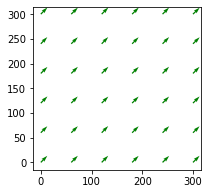

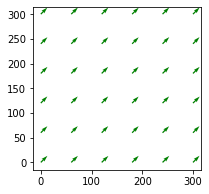

In [54]:
reload(oceangym)
env = oceangym.OceanScape()
obs = env.reset()

while True:
    # Take a random action
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    # Render the game
    env.render()
    #plt.show()

    if done == True:
        cv2.waitKey(0)
        break

env.close()

In [77]:
import seaborn as sns

xvals [[-0.31143672 -0.62831593  0.358469   -0.78047751  0.27402968  0.62205706]
 [-0.12235572  0.29426599 -0.03232026  0.29158423  0.90244117  0.62579227]
 [-0.0499586   0.83350103 -0.34299941  0.57234617  0.31810337  0.15111581]
 [-0.35327595  0.44459219  0.49862804  0.33184597 -0.67452167  0.54270456]
 [ 0.45407191  0.76197289  0.53336396 -0.80230274  0.91130007 -0.75835775]
 [-0.6930325   0.5488752   0.68483316  0.0839533   0.04029541 -0.73985713]]
x [0.5 1.5 2.5 3.5 4.5 5.5]


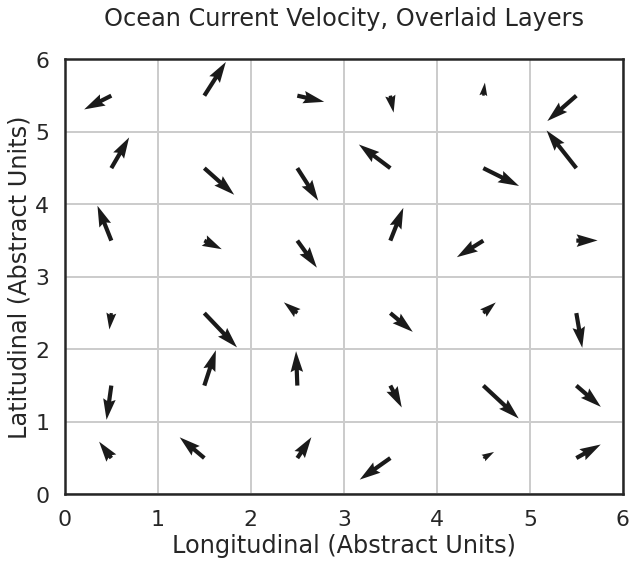

In [93]:
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style='white', context='poster')



plt.figure(figsize=(10,8))
x, y, u, v = np.random.random((4,10))
#xvals = np.random.random((6,6))
#yvals = np.random.random((6,6))
xvals = np.random.uniform(-1, 1, (6,6)) * .98
yvals = np.random.uniform(-1, 1, (6,6)) * .98
print('xvals', xvals)

x = np.linspace(0.5, 5.5, 6) 
y = np.linspace(0.5, 5.5, 6) 
print('x', x)
xx, yy = np.meshgrid(x, y) 
xx, yy = np.meshgrid(x, y) 

plt.quiver(xx, yy, xvals, yvals,)

plt.title('Ocean Current Velocity, Overlaid Layers\n')
plt.ylabel('Latitudinal (Abstract Units)')
plt.xlabel('Longitudinal (Abstract Units)')
plt.xlim(0, 300/50)
plt.ylim(0, 300/50)
plt.grid(True)
#plt.savefig('./wind_vectors_2.png',  transparent=True)
plt.show()



In [ ]:
x = np.linspace(0, self.observation_shape[0], self.wind_grid_shape[0]) 
y = np.linspace(0, self.observation_shape[1], self.wind_grid_shape[1]) 

self.xx, self.yy = np.meshgrid(x, y) 
self.xx, self.yy = np.meshgrid(x, y) 

In [27]:
print 'test'

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('test')? (<ipython-input-27-ce388b0a451c>, line 1)

# END

In [10]:
plt.ion()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from stable_baselines3 import A2C
env = oceangym.OceanScape()
from tqdm.auto import tqdm

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


test progress bar:  38%|███▊      | 376/1000 [00:11<00:23, 27.13it/s]

oops ran out of battery, final return -10
final position (39, 30)


test progress bar:  83%|████████▎ | 832/1000 [00:25<00:05, 30.54it/s]

oops ran out of battery, final return -10
final position (35, 30)


test progress bar: 100%|██████████| 1000/1000 [00:30<00:00, 32.52it/s]


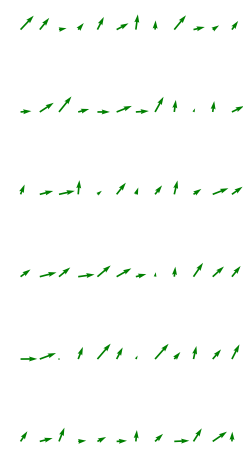

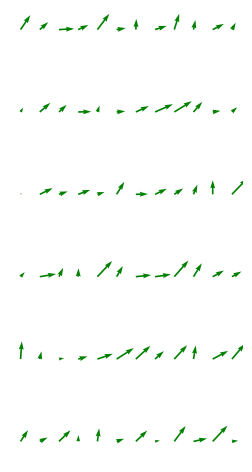

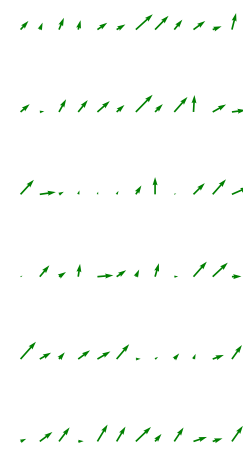

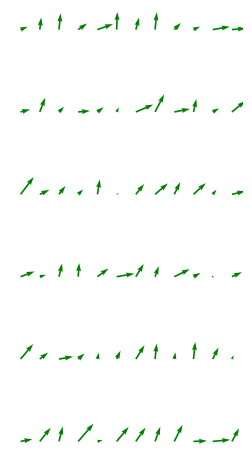

In [14]:
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1)

obs = env.reset()
for i in tqdm(range(1000), desc='test progress bar'):
  action, _state = model.predict(obs, deterministic=True)
  obs, reward, done, info = env.step(action)
  env.render()
  if done:
    obs = env.reset()

## Remove render function from step()

Save final result as coordinates and render at end